In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk


     ---------------------------------------- 1.5/1.5 MB 5.9 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 263.0/263.0 kB ? eta 0:00:00


In [4]:
pip install WordCloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas 
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd                     
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline

import os
import keras
import numpy as np
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.applications import MobileNet
from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory



sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
pip install nltk

In [6]:
pip install pandas

In [7]:
train = pd.read_csv('data\Train.csv')
test = pd.read_csv('data\Test.csv')

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install panda

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install sentiment

Note: you may need to restart the kernel to use updated packages.


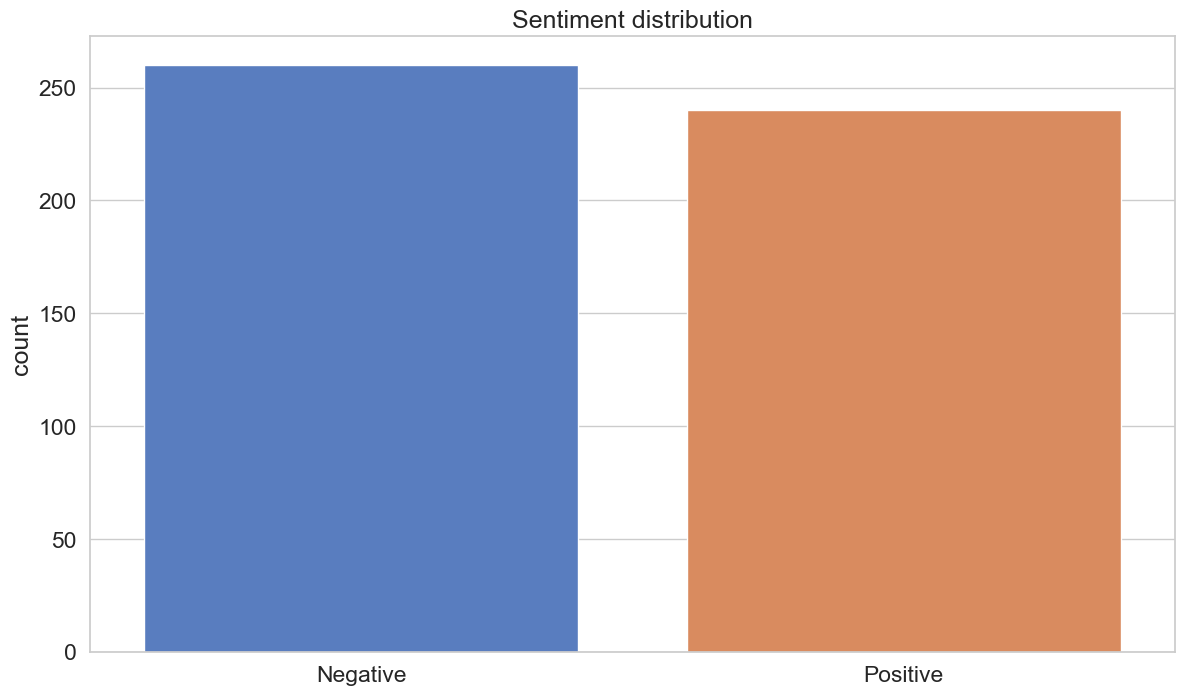

In [12]:
f = sns.countplot(x='sentiment', data=train)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

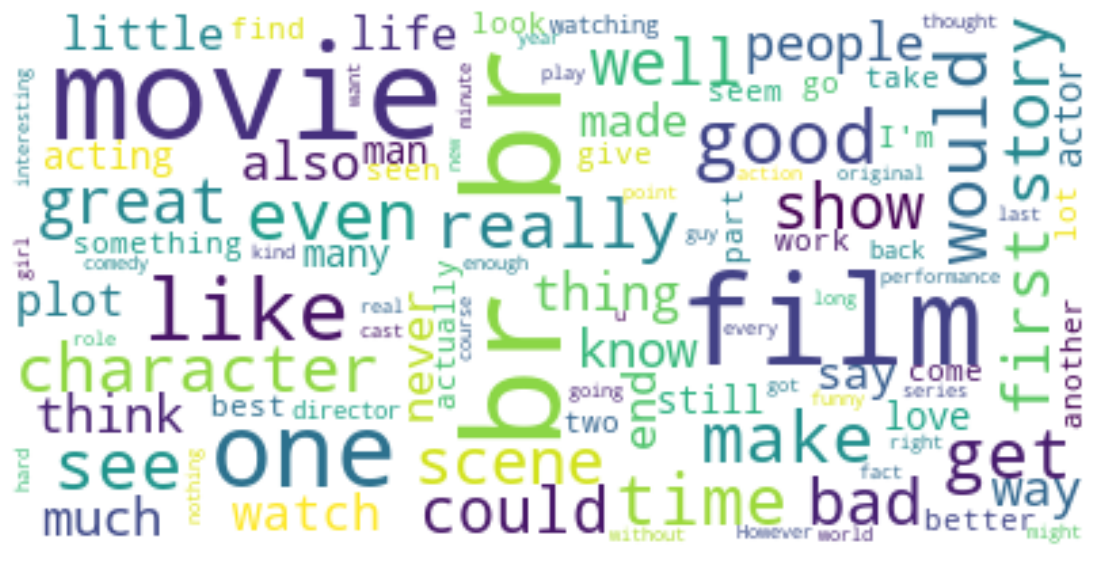

In [13]:
text = " ".join(review for review in train.review)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [14]:
class Tokenizer:
  
  def clean(self, text):
      no_html = BeautifulSoup(text).get_text()
      clean = re.sub("[^a-z\s]+", " ", no_html, flags=re.IGNORECASE)
      return re.sub("(\s+)", " ", clean)

 
  def tokenize(self, text):
      clean = self.clean(text).lower()
      stopwords_en = stopwords.words("english")
      return [w for w in re.split("\W+", clean) if not w in stopwords_en]

In [15]:
class MultinomialNaiveBayes:
  
    def __init__(self, classes, tokenizer):
      self.tokenizer = tokenizer
      self.classes = classes
      
    def group_by_class(self, X, y):
      data = dict()
      for c in self.classes:
        data[c] = X[np.where(y == c)]
      return data
           
    def fit(self, X, y):
        self.n_class_items = {}
        self.log_class_priors = {}
        self.word_counts = {}
        self.vocab = set()

        n = len(X)
        
        grouped_data = self.group_by_class(X, y)
        
        for c, data in grouped_data.items():
          self.n_class_items[c] = len(data)
          self.log_class_priors[c] = math.log(self.n_class_items[c] / n)
          self.word_counts[c] = defaultdict(lambda: 0)
          
          for text in data:
            counts = Counter(self.tokenizer.tokenize(text))
            for word, count in counts.items():
                if word not in self.vocab:
                    self.vocab.add(word)

                self.word_counts[c][word] += count
                
        return self
      
    def laplace_smoothing(self, word, text_class):
      num = self.word_counts[text_class][word] + 1
      denom = self.n_class_items[text_class] + len(self.vocab)
      return math.log(num / denom)
      
    def predict(self, X):
        result = []
        for text in X:
          
          class_scores = {c: self.log_class_priors[c] for c in self.classes}

          words = set(self.tokenizer.tokenize(text))
          for word in words:
              if word not in self.vocab: continue

              for c in self.classes:
                
                log_w_given_c = self.laplace_smoothing(word, c)
                class_scores[c] += log_w_given_c
                
          result.append(max(class_scores, key=class_scores.get))

        return result

In [16]:
pip install train

Note: you may need to restart the kernel to use updated packages.


In [17]:
X = train['review'].values
y = train['sentiment'].values
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [18]:
MNB = MultinomialNaiveBayes(
    classes=np.unique(y), 
    tokenizer=Tokenizer()
).fit(X_train, y_train)

In [27]:
pip install bow-mnb

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install mnb

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mnb (from versions: none)
ERROR: No matching distribution found for mnb


In [29]:
y_hat = MNB.predict(X_test)

In [30]:
accuracy_score(y_test, y_hat)

0.74

In [31]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        60
           1       0.79      0.47      0.59        40

    accuracy                           0.74       100
   macro avg       0.76      0.70      0.70       100
weighted avg       0.75      0.74      0.72       100



In [32]:
pip install cnf

Note: you may need to restart the kernel to use updated packages.


In [33]:
cnf_matrix = confusion_matrix(y_test, y_hat)
cnf_matrix

array([[55,  5],
       [21, 19]], dtype=int64)

In [34]:
pip install cnf

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install plt-pack

Note: you may need to restart the kernel to use updated packages.


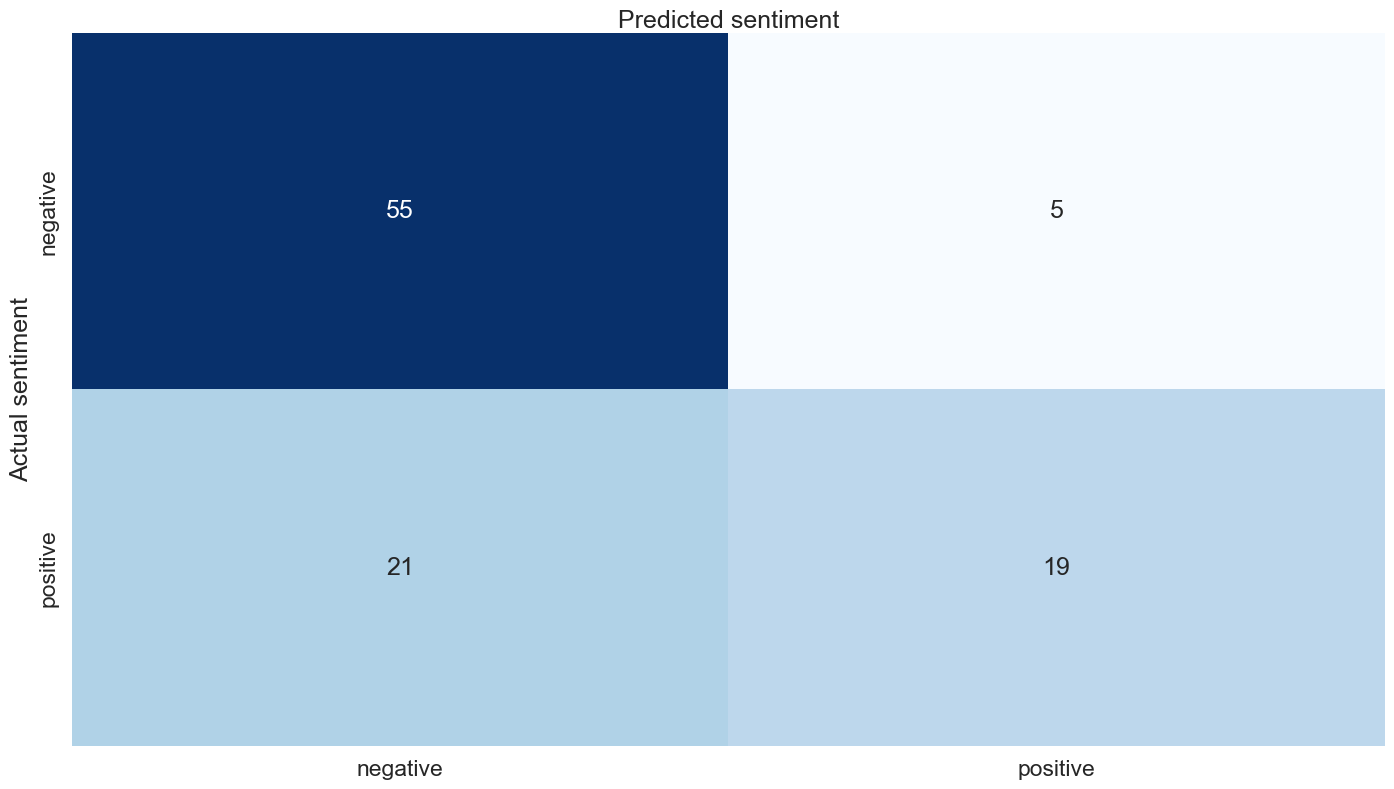

In [37]:
class_names = ["negative", "positive"]
fig,ax = plt.subplots()


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt="d", cbar=False, xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual sentiment')
plt.xlabel('Predicted sentiment');

In [6]:
pip install plot

     -------------------------------------- 135.1/135.1 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 78.6/78.6 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 151.7/151.7 kB 4.6 MB/s eta 0:00:00
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26306 sha256=b0181155599f33ec83ad36e78b6850346b842f469d8e8735bfc9f120256ba728
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\7c\d0\9e\1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing
Note: you may need to restart the kernel to use updated packages.
